# Self Organizing Maps

Kümeleme ve Feature Detection için kullanılır. Genel olarak K-Means algoritmasını kullanır ki bu algoritma verileri kümelemek için kullanılır. Kümeleyeceği verilerin boyutları ne olursa olsun karmaşık verileri bile kümeler. Aşağıda 2 boyutlu verileri kümelemiş ama 3, 5, hatta 10+ boyutlu verileri bile kümelemek için kullanılır.<br>
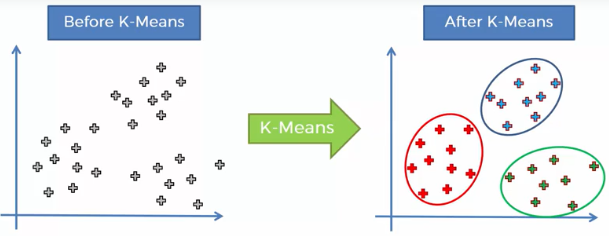

### K-Means Nasıl Çalışır?

1- Küme sayısını belirle K tane<br>
2- Veri üzerinde rasgele K tane merkez noktası(centroid) belirle, çünkü kümeler bunların etraflarında oluşacak<br>
3- Her bir veriyi kendisine en yakın olan merkez noktasıyla aynı kümede olacak şekilde kümelere ayır, uzaklık hesaplamaları için farklı formüller vardır ve verisetimize göre şekillenir. Örn Euclidean Distance<br>
4- Oluşan her bir kümenin merkez noktasını yeniden hesapla ve bu nokta tam merkezde olacak şekilde yerini-kordinatlarını belirle<br>
5- Her bir veriyi yeniden kendisine en yakın olan merkez noktasıyla aynı kümede olacak şekilde kümelerini güncelle. Eğer hiçbir veri yeni bir kümeye taşınmazsa işlem bitmiştir, eğer taşınırsa adım 4'e dön ve öyle devam et.

### K-Means++ Choosing Right Places of Centroids

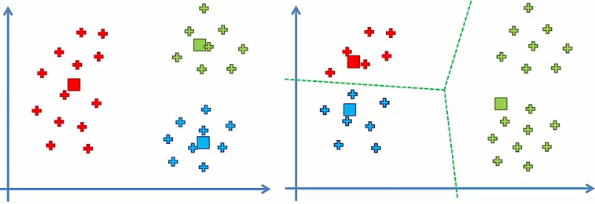<br>
K means'te centroidler rasgele belirlenir dedik. Resme baktığımızda sol taraftaki resimde centroidler rasgele olarak o kadar iyi yerlere düşmüşler ki direkt etraflarındaki verilerle kümelenmişler ve iterasyon yapmaya gerek kalmadan kümeler belirlenmiş. Sağdakinde ise centroidler düzgün yerlere gelmemişler böylece kümelenmeler değişmiş, kümelenmelere baktığımızda da sağdakilerin iki farklı küme olması daha uygunken tek bir küme olmuşlar, soldakiler de iki kümeye ayrılmışlar. Kısaca söylenebilir ki centroidlerin rasgele belirlendiği ilk noktalar, kümelenmeler sonucunu etkileyen önemli bir faktördür. Bu rasgele belirlenen centroidler kümelenmeleri soldaki gibi çok iyi yapabildiği gibi, sağdaki gibi kötü de yapabilirler, sonuca direkt olarak etkileri olabilmektedir. Peki bununla nasıl başa çıkabiliriz? Bunun için K-means++ algoritması kullanılır, yani K-means'a eklemeler yapılmış hali kullanılır ki bu rasgele seçilen centroidlerin en iyi yerlere denk düşmesini sağlar. K-means++ sayesinde soldaki görüntünün elde edileceği kabul ediliyor.

### Choosing the Right Numbers of Clusters

Kaç tane küme olacağına nasıl karar verebiliriz, ya da verimizin kaç kümeye ayrılacağını bilemiyorken küme sayısını nasıl belirleriz?<br>
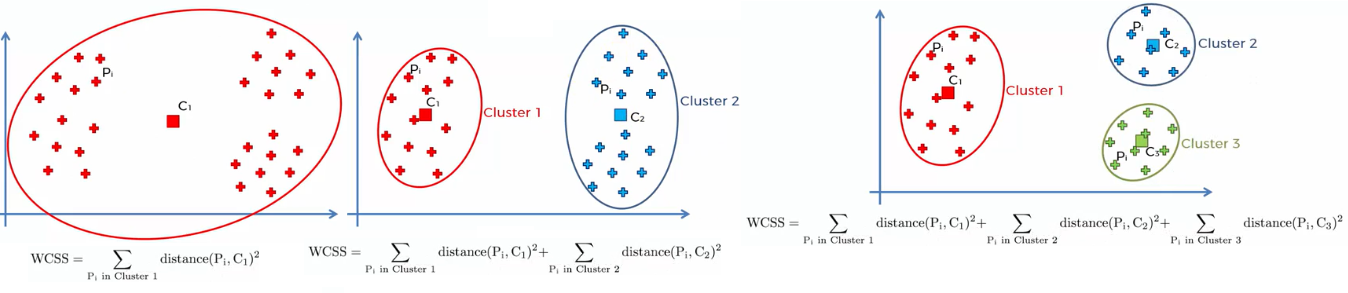<br>
WCSS kullanarak tabiki. Yukarıdaki resimde görüldüğü üzere WCSS ilk olarak bütün verileri bir küme olarak kabul eder ve her bir verinin centroide olan uzaklığını toplar. Tabiki bu toplam sonucu formülde görüleceği üzere yüksek çıkacaktır. Sonra WCSS iki küme varmış gibi kabul ederek tekrar kümeleme yapar ve yine kümelerdeki verilerin centroidlere uzaklığını hesaplayarak toplar. Tabiki çıkan sonuc, bir kümeli sonuçtan daha küçük çıkacaktır. Ve sonra 3 küme varmış gibi kabul eder böyle böyle gider, her bir adımdaki sonuç bir öncekinden düşük çıkacağından daha iyi kümelenmeler oluşacağı varsayılır. Bu veri sayısına kadar devam edebilir. Yani 50 verimiz varsa, 50 küme oluşana kadar böyle devam edebilir, tabiki 50 veride 50 küme olunca her bir veri kendi centroidleri olacağından mesafeler toplamı sıfır olacaktır ve WCSS sonucu sıfır olarak en iyi değerini alacaktır ama bizim istediğimiz bu değil tabiki. Peki en iyi küme sayısını nasıl bulup WCSS'ye dur artık diyeceğiz?

<b>Elbow Method</b><br>
Burada da Elbow metodu devreye girecektir. Elbow metodu her bir küme sayısı için yukarıdaki WCSS değerlerine bakarak bir tablo oluşturur ve aşağıdaki resimde görüleceği üzere 1 küme sayısı ile 2 küme sayısı, 2 küme sayısı ile 3 küme sayısı arasındaki fark, diğer kümelenme sayıları arasındaki farklara göre oldukça büyüktür. Küme sayısı değiştikçe 1-2-3 kümelerdeki WCSS sonucu büyük iken 3'ten sonra küçülmeye çok bir fark yaratmamaya başlamaktadır. Bunu farkeden Elbow, resme göre küme sayısını 3 olarak belirleyecektir çünkü 3'e kadar WCSS sonuçları büyükken, 3'ten sonra küçülmüş ve genelde benzer-çokyakın sonuçlarla devam etmiştir. Tabi Elbow Metodu bize karar vermede yardımcı olmak için vardır, asıl küme sayısını bizim belirlememiz lazım.<br>
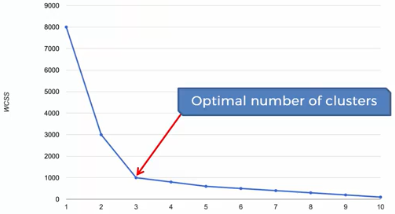

### SOM Nasıl Öğrenir?

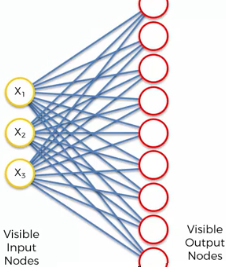<br>
Elimizde 3 inputlu-indikatörlü-sütunlu-featureli bir verimiz olsun. SOM aşağıdaki gibi bir görünüme sahip olacaktır ve verimizi 3 indikatörlü olan 3D verimizi 2 indikatöre 2D'ye düşürecektir.<br><br>
Başlarda her bir giriş nöronu ile çıkış nöronu arasındaki ağırlıklar rasgele dağıtılır. Çıkış nöronlarında normal yapay sinir ağlarından farklı olarak aktivasyon fonksiyonu bulunmaz, ağırlıklarla yapılan tek işlem ağırlıkları kendi özelliği olarak belirlemeleridir. Yani örneğin en üstteki çıkış nöronu kendi içinde şu bilgileri kendi yapısı olarak tanımlayacaktır:<br>
Node1 = (WeightX1, WeightX2, WeightX3)<br><br>
Bu nöronların ağırlıkları alıp kendilerine tanımlama işlemi SOM'un ana işlemidir diyebiliriz. Bu işlemden sonra yapılacak şey bütün veri setini baştan sonra gezip, hangi veri hangi çıkış nöronunun tanımlamasına uyuyor onun belirlenmesidir. Bu belirlenirken de nöronun içindeki ağırlık bilgileri kullanılıyor tabikide. Örnek olarak aşağıdaki resmi inceleyebiliriz.

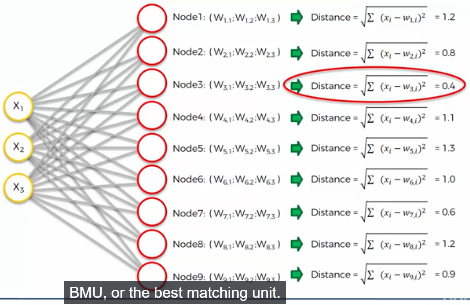<br>
Yukarıdaki resimde veri setimizdeki ilk satır verilmiş olsun, yani ilk verimiz ve 3 tane featuresi var. Bu verinin her bir çıkış notuna uzaklığı hesaplanıyor ve en yakın olduğu Node Best Matching Unit olarak belirleniyor. Ardından BMU olarak belirlenen nöronun bütün ağırlıkları bu verinin ağırlıklarına göre güncelleniyor.

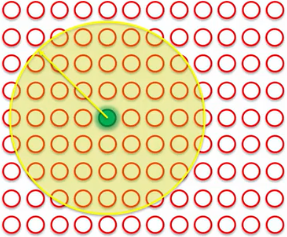<br>
İlk veri için BMU'nun yeşil node olduğunu ve diğer nodeların çıkış nodları olduğunu düşünerek aşağıdaki mapı incelersek, BMU'nun ağırlıkları ilk veriye göre güncellendikten sonra etrafında bir radius oluşur ve etrafındaki diğer nodeların ağırlıkları da güncellenir. BMU'ya en yakın nodelar kendisine yakın olacak şekilde yüksek ağırlıklarla güncellenecekken radius çemberinin kenarlarına doğru gidildikçe bu ağırlıkların değeri de düşecektir ki yakın olanlardan daha uzak oldukları belli olsunlar.

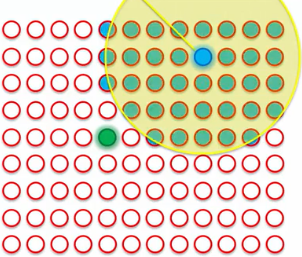<br>
İkinci satırdaki verimiz de geldi diyelim ve onun BMU'su da mavi renkli olarak belirlendi ve etrafındaki ağırlıkları güncellendi. Peki iki radius arasında kalan ortak nodelar nasıl güncellencek, yani mavi ile yeşil BMU'lara göre nasıl güncellenecekler?

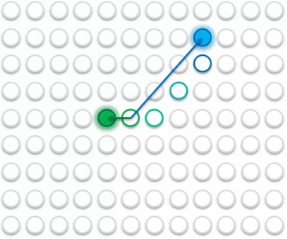<br>
Her bir BMU kendisinin radiusunda kalan nodeların ağırlıklarını günceller, ancak kendisine ne kadar yakınsa o kadar yüksek, ne kadar uzaksa o kadar düşük ağırlıklandırır dedik. Resimde görüldüğü üzere her iki BMU'nun da radius alanında kalan nodeların nasıl şekillenecekleri renklerle anlatılmış durumda. Her iki BMU'nun da nodelara etkisi var ancak her iki BMU da kendisine en yakın nodeları fazlaca etkiliyor ve renkleri birbirine yakın oluyor. Örneğin ortada kalan node mavimsi ve yeşilimsi karışık bir renge sahip çünkü iki BMU tarafından da benzer etkiye uğruyor ve ona göre güncelleniyor.

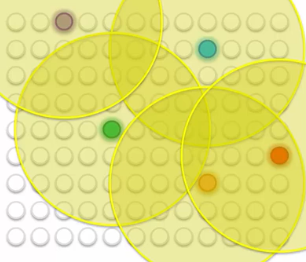<br>
Bu resimde bir kaç adet BMU ünit yani küme oluşmuş durumda ve hepsinin radiusu var. Her bir nöron fazla sayıda BMU'dan etkileneceğinden ötürü radiuslarını küçültmek gerekecektir. Bunun için Kohonen Learning Algorithm uygulanır.

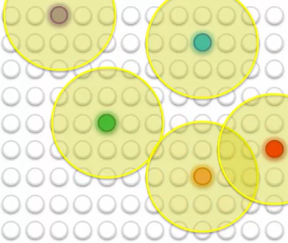<br>
Bu algoritma sayısız kere, kümeler en iyi biçimlerine gelene kadar uygulanır, yani bu hedeflenir. Böylece en kesin kümelere ulaşmış oluruz ve bu veri setinin işlenmesi süresince yapılır. Sonunda şöyle bir görüntü ortaya çıkacaktır:

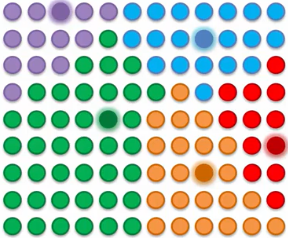<br>

SOM'un bu haritayı çıkarımı hakkında bilmemiz gereken şeyler vardır:<br>
-Veri setimizdeki veriler arasında bir ilişkinin bulunması lazımdır, birbiriyle alakasız çokça veri iyi sonuçlar vermeyecektir.<br>
-Verilerdeki feature-sütun-indikatör sayısı yüksek olduğunda işler baya karışacaktır. Çok fazla featuresli verilerde iyi çalışmayabilir.<br>
-Supervising olmadan sınıflandırma yapar, ki özelliği de budur.
-Nöronlar bir aktivasyon fonksiyonu kullanmaz. Backpropagation işlemi yapılmaz, çünkü labeller yoktur.<br>
-Çıkış nöronları-nodeları arasında bağlantılar ve ilişkiler bulunmaz. Resimlerdeki şeyler sadece gösterme amaçlıdır.